# Time Series Project lake Bilancino

### Project with the goal of predict quantity of water of lake Bilancino in Italy

In [54]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [29]:
#load data
raw_data = pd.read_csv("/workspaces/time-series-lake-bilancino/data/raw/Lake_Bilancino.csv")
raw_data.to_csv("/workspaces/time-series-lake-bilancino/data/raw/raw_data.csv")
raw_data

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [30]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [31]:
raw_data.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [32]:
total_data = raw_data.drop(['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci','Flow_Rate'],  axis=1)
total_data.head(11)

,Date,Lake_Level
0,03/06/2002,249.43
1,04/06/2002,249.43
2,05/06/2002,249.43
3,06/06/2002,249.43
4,07/06/2002,249.44
5,08/06/2002,249.56
6,09/06/2002,249.57
7,10/06/2002,249.58
8,11/06/2002,249.57
9,12/06/2002,249.57


In [46]:
total_data['Lake_Level'].max()

np.float64(252.76)

In [47]:
total_data['Lake_Level'].min()

np.float64(243.53)

In [33]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6603 non-null   object 
 1   Lake_Level  6603 non-null   float64
dtypes: float64(1), object(1)
memory usage: 103.3+ KB


### <span style="color: orange;">No null data</span>


## Time Series visualization

In [34]:
#  transformation of it to generate a time series with two dimensions
total_data["Date"] = pd.to_datetime(total_data["Date"], dayfirst=True)
total_data = total_data.set_index("Date")
ts_lake = total_data["Lake_Level"]
ts_lake.head()


Date
2002-06-03    249.43
2002-06-04    249.43
2002-06-05    249.43
2002-06-06    249.43
2002-06-07    249.44
Name: Lake_Level, dtype: float64

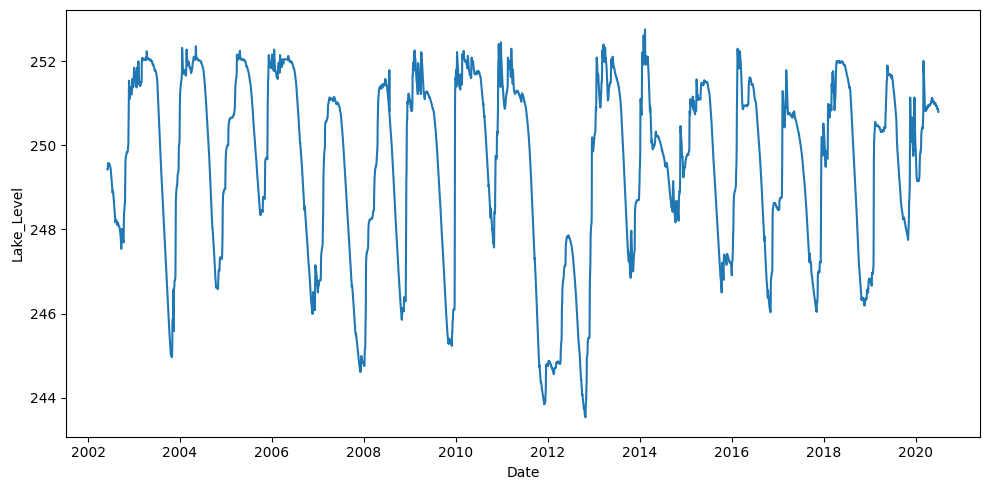

In [35]:
# Plot data to visualize:

fig, axis = plt.subplots(figsize = (10, 5))
# Insert the Data

sns.lineplot(data = ts_lake)


plt.tight_layout()
plt.show()

Decomposition of the series

In [37]:
# descomposing time serie
# minimum time unit = one day

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_lake, period = 30)
decomposition

Which is the trend?


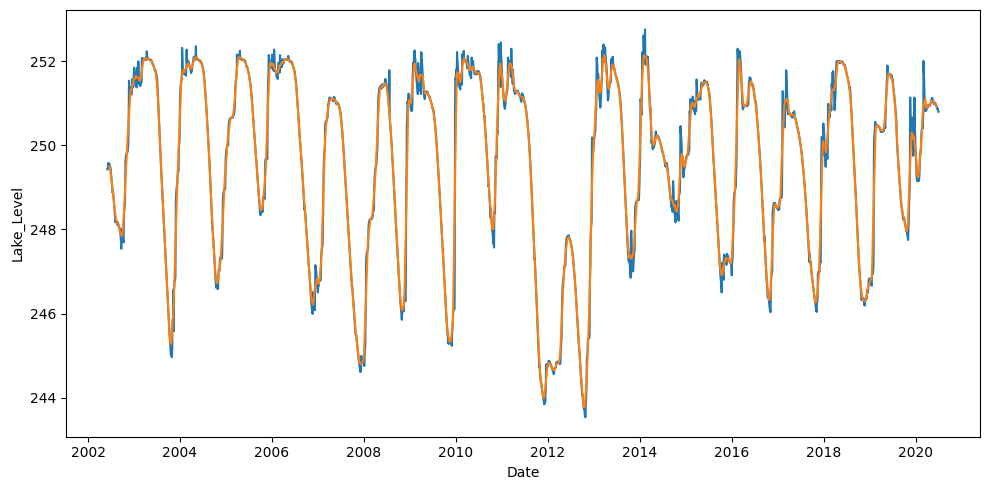

In [38]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_lake)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

### <span style="color: orange;">A lot of variability in the trend, therefore, it have some relation with some external factor as climatology</span>


Is it stationary?

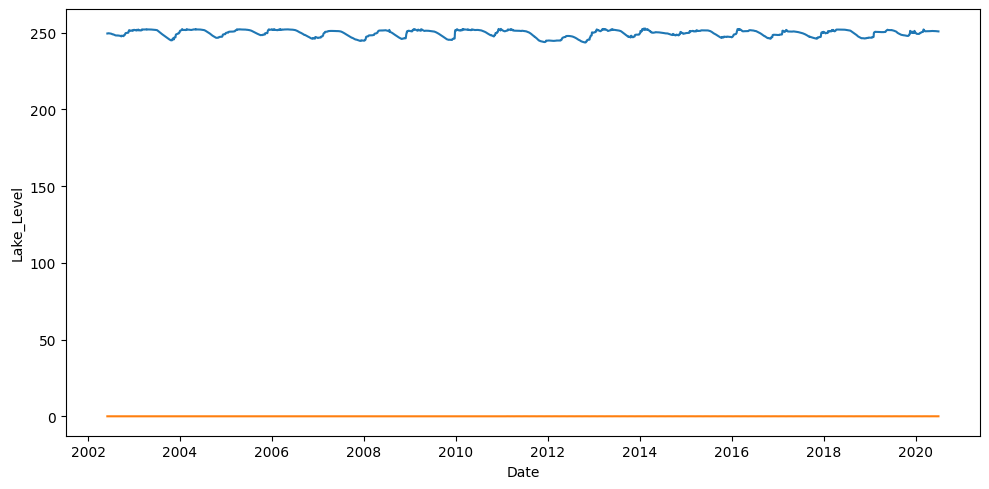

In [39]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_lake)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [40]:

# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_lake)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                -6.880991e+00
p-value                        1.433634e-09
#Lags Used                     3.500000e+01
Number of Observations Used    6.567000e+03
Critical Value (1%)           -3.431346e+00
Critical Value (5%)           -2.861980e+00
Critical Value (10%)          -2.567004e+00
dtype: float64

### <span style="color: orange;">p-value is greater than 0.05, this means that our null hypothesis will be rejected and we will take this series as non-stationary.</span>


Is there variability or noise?

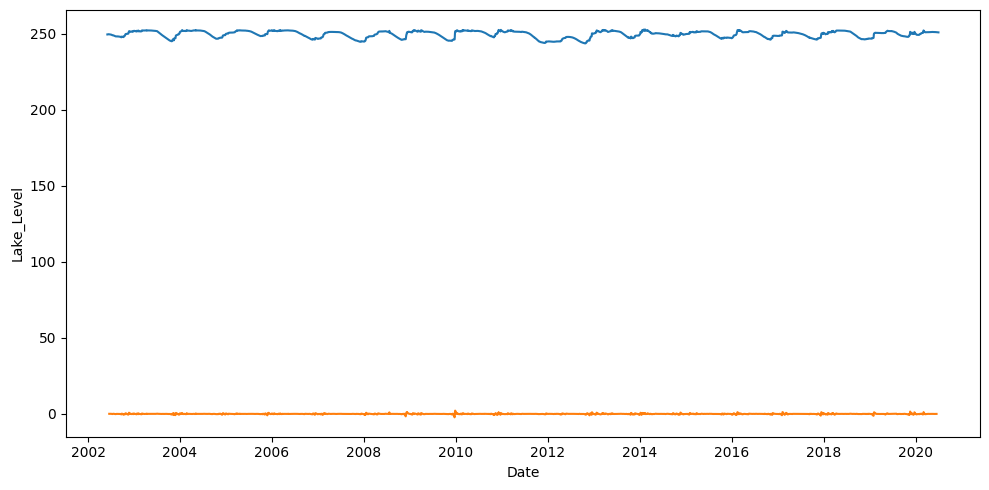

In [41]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_lake)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

### <span style="color: orange;">there is some variability, but not too much. Max Lake_level = 252.76 & min Lave_level = 243.53</span>


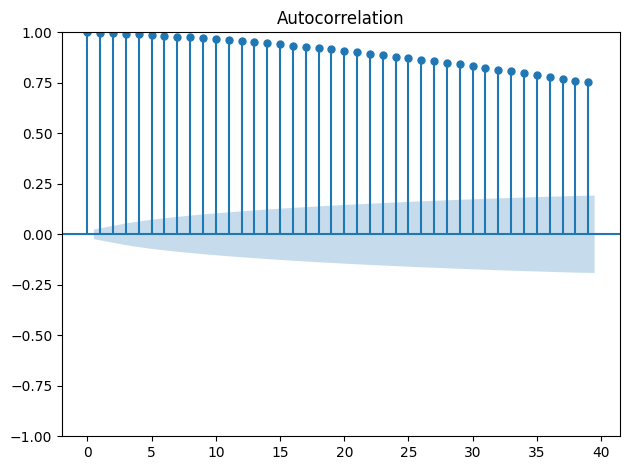

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts_lake)

plt.tight_layout()

plt.show()

### <span style="color: orange;">The graph shows that the autocorrelations are very high and persistent. This indicates that the lake's water levels are highly correlated with its past values. The slow decay of the autocorrelation suggests that the time series has a trend or non-stationarity component. </span>


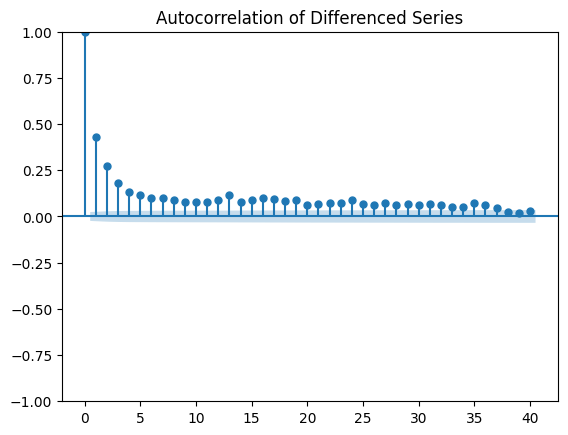

ADF Statistic: -10.865056104715174
p-value: 1.414384174690294e-19


In [49]:
from statsmodels.tsa.stattools import adfuller

# Diferenciar la serie
ts_lake_diff = ts_lake.diff().dropna()

# Graficar ACF de la serie diferenciada
plot_acf(ts_lake_diff, lags=40)
plt.title('Autocorrelation of Differenced Series')
plt.show()

# Prueba de Dickey-Fuller
result = adfuller(ts_lake_diff)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

## Model


In [57]:
from pmdarima import auto_arima
model = auto_arima(ts_lake, seasonal=False, trace=True, d=1)  
print(model.summary())

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject